In [1]:
import tensorflow as tf
import cv2 as cv
import os

In [2]:
params = {
    'TRAIN_DATASET':'data/train_filtered',
    'VAL_DATASET':'data/val_filtered',
    'epochs':20,
    'batch_size':16,
    'target_size':[128,128]
}

In [3]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    channel_shift_range=0.3,
    fill_mode="nearest",
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1. / 255,
)

val_datagen =  tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
)

In [4]:
train = train_datagen.flow_from_directory(
    directory = params['TRAIN_DATASET'],
    target_size=params['target_size'],
    class_mode='categorical',
    shuffle=True,
    batch_size=params['batch_size']
)

val = train_datagen.flow_from_directory(
    directory = params['VAL_DATASET'],
    target_size=params['target_size'],
    class_mode='categorical',
    shuffle=True,
    batch_size=params['batch_size']
)

Found 8178 images belonging to 120 classes.
Found 2044 images belonging to 120 classes.


In [5]:
from keras.layers import Dropout,Conv2D,Flatten,MaxPooling2D,Dense
from keras.models import Sequential

clf = Sequential()
clf.add(Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
clf.add(MaxPooling2D(pool_size=(2,2))) 
clf.add(Conv2D(64,(3,3),activation='relu'))
clf.add(MaxPooling2D(pool_size=(2,2)))
clf.add(Conv2D(32,(3,3),activation='relu'))
clf.add(MaxPooling2D(pool_size=(2,2)))     
clf.add(Conv2D(64,(3,3),activation='relu'))
clf.add(MaxPooling2D(pool_size=(2,2)))
clf.add(Conv2D(32,(3,3),activation='relu'))
clf.add(MaxPooling2D(pool_size=(2,2)))
clf.add(Flatten())        
clf.add(Dense(units=512, activation='relu'))
clf.add(Dropout(0.2))
clf.add(Dense(units=120,activation='softmax'))

print(clf.summary())

clf.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

Using TensorFlow backend.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)           

In [6]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint = ModelCheckpoint(
                             'Model/simple_intuitive_cnn.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)


callbacks = [checkpoint]

In [7]:
history = clf.fit_generator(
        train,
        epochs = 100,
        validation_data = val,
        callbacks=callbacks,
)

s 105ms/step - loss: 4.7523 - accuracy: 0.0155 - val_loss: 4.8181 - val_accuracy: 0.0225

Epoch 00003: val_loss did not improve from 4.72460
Epoch 4/100
512/512 [==============================] - 54s 106ms/step - loss: 4.6637 - accuracy: 0.0225 - val_loss: 4.5210 - val_accuracy: 0.0171

Epoch 00004: val_loss improved from 4.72460 to 4.52101, saving model to Model/simple_intuitive_cnn.h5
Epoch 5/100
512/512 [==============================] - 56s 109ms/step - loss: 4.6045 - accuracy: 0.0242 - val_loss: 4.3003 - val_accuracy: 0.0303

Epoch 00005: val_loss improved from 4.52101 to 4.30033, saving model to Model/simple_intuitive_cnn.h5
Epoch 6/100
512/512 [==============================] - 54s 106ms/step - loss: 4.5606 - accuracy: 0.0257 - val_loss: 4.5206 - val_accuracy: 0.0284

Epoch 00006: val_loss did not improve from 4.30033
Epoch 7/100
512/512 [==============================] - 59s 116ms/step - loss: 4.5425 - accuracy: 0.0280 - val_loss: 4.5698 - val_accuracy: 0.0323

Epoch 00007: val

Text(0.5, 1.0, 'Training and validation loss')

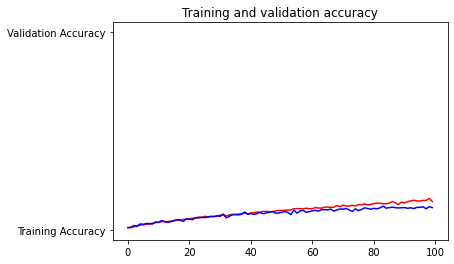

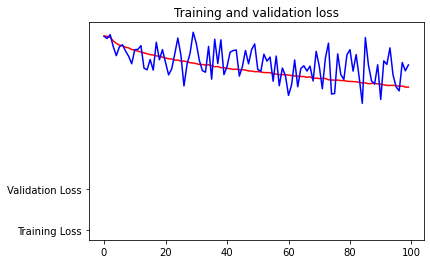

In [14]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')
